# set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# import dataset

## read data from excel

In [2]:
import pandas as pd
data = pd.read_excel(r'C:\Users\ASUS\Desktop\machine learning\MLfinalReport\AHIdata.xlsx')

## extract y from excel

In [3]:
df = pd.DataFrame(data, columns=['rescored AHI'])
print(type(df))#datatype is pd.dataframe not numpy array
df_2D = df.to_numpy()#convert into numpy array
#print(df_2D)#now it is numpy 2d array

<class 'pandas.core.frame.DataFrame'>


In [4]:
y_stack = df_2D.flatten()#flatten into 1d array
print(y_stack)

[ 15.2  12.   27.8  71.2  34.3  86.9  17.5  78.3  40.5  21.2  94.7  40.2
  41.1  11.5  61.4 108.8  59.6  24.1   9.5  33.2  11.9  76.7  29.7  23.7
  38.   79.9  13.8  61.9   8.8   8.5  37.1  38.7  33.9  46.4  34.5  25.8
  82.3  13.4  85.4  42.9  24.3  37.8  16.9  47.6  50.   21.1   1.6   2.1
  12.3  66.3  27.9  17.    2.   11.   53.   20.8  50.9  15.6  66.2  56.1
  49.8  10.2  77.7   7.2   3.   47.3  78.9  15.6   9.   47.2  12.    7.6
  42.3  26.3   7.5  31.5   1.9  15.8  11.6   8.5  20.5  52.4  20.2  16.6
  19.8  37.9  60.2  36.1  24.5  24.6  22.4  30.   16.9   7.7   8.8   7.1
  39.1   4.6   1.8  97.3  60.5   6.9  28.3  41.   75.   13.7  89.2  76.5
  85.   77.   51.2   3.3  78.1   7.9  26.9  80.5  30.9  66.9   2.3]


## encoding y_stack

In [5]:
for count in range (0, 119):
    if y_stack[count]>=30:#AHI>=30, class:3
        y_stack[count]=3
    elif y_stack[count]>=15:#30>AHI>=15, class:2
        y_stack[count]=2
    elif y_stack[count]>=5:#15>AHI>=5, class: 1
        y_stack[count]=1
    else:
        y_stack[count]=0#5>AHI, class:0

## extract inputs from excel

In [6]:
#BMI
x1 = pd.DataFrame(data, columns=['BMI'])
x1_2D = x1.to_numpy()#convert into numpy array
x_bmi = x1_2D.flatten()#flatten into 1d array
#Age
x2 = pd.DataFrame(data, columns=['Age'])
x2_2D = x2.to_numpy()#convert into numpy array
x_age = x2_2D.flatten()#flatten into 1d array
#neck
x3 = pd.DataFrame(data, columns=['neck'])
x3_2D = x3.to_numpy()#convert into numpy array
x_neck = x3_2D.flatten()#flatten into 1d array
#desaturatino index
x4 = pd.DataFrame(data, columns=['desaturation index'])
x4_2D = x4.to_numpy()#convert into numpy array
x_dsi = x4_2D.flatten()#flatten into 1d array
#CVHR-OR_CEI
x5 = pd.DataFrame(data, columns=['Aligned CVHR-OR-CEI'])
x5_2D = x5.to_numpy()#convert into numpy array
x_cvhrorcei = x5_2D.flatten()#flatten into 1d array
#CVHRI
x6 = pd.DataFrame(data, columns=['CVHRI'])
x6_2D = x6.to_numpy()#convert into numpy array
x_cvhri = x6_2D.flatten()#flatten into 1d array
#CEI
x7 = pd.DataFrame(data, columns=['CEI'])
x7_2D = x7.to_numpy()#convert into numpy array
x_cei = x7_2D.flatten()#flatten into 1d array

## decide your two inputs

In [7]:
X_stack = np.stack((x_bmi, x_cvhrorcei), axis=-1)

# Data preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X=scale.fit_transform(X_stack)

In [ ]:
X

## train test validation split

In [9]:
from sklearn.model_selection import train_test_split 
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_stack, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.4, shuffle=False)

# Training SVR model

## decide hyperparameters

In [10]:
from sklearn.model_selection import GridSearchCV
#linear model tuning
param_dist_linear = {'C': [0.1, 1, 10, 100, 1000],
                     'decision_function_shape':['ovo','ovr']}
#rbf model tuning
param_dist_rbf = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'decision_function_shape':['ovo','ovr']}
#poly model tuning
param_dist_poly = {'C': [0.1, 1, 10, 100, 1000],
                   'degree': range(1, 10),
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                   'decision_function_shape':['ovo','ovr']}
#sigmoid model tuning
param_dist_sig = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'decision_function_shape':['ovo','ovr']}

In [11]:
from sklearn import svm
linear = svm.SVC(kernel='linear', random_state=42)
rbf = svm.SVC(kernel='rbf', random_state=42)
poly = svm.SVC(kernel='poly', random_state=42)
sig = svm.SVC(kernel='sigmoid', random_state=42)

In [12]:
grid_linear = GridSearchCV(linear, param_dist_linear, cv=3, scoring='accuracy', n_jobs=-1)
grid_linear.fit(X_val, y_val)
grid_rbf    = GridSearchCV(rbf, param_dist_rbf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rbf.fit(X_val, y_val)
grid_poly   = GridSearchCV(poly, param_dist_poly, cv=3, scoring='accuracy', n_jobs=-1)
grid_poly.fit(X_val, y_val)
grid_sig    = GridSearchCV(sig, param_dist_sig, cv=3, scoring='accuracy', n_jobs=-1)
grid_sig.fit(X_val, y_val)

GridSearchCV(cv=3, estimator=SVC(kernel='sigmoid', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [13]:
grid_linear.best_params_

{'C': 1, 'decision_function_shape': 'ovo'}

In [14]:
grid_rbf.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1}

In [15]:
grid_poly.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 1}

In [16]:
grid_sig.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1}

## create a SVR model

from website: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

In [17]:
from sklearn import svm
#training optimized linear model
linear = svm.SVC(kernel='linear',
                 random_state=42,
                 C=grid_linear.best_params_.get('C'), 
                 decision_function_shape=grid_linear.best_params_.get('decision_function_shape')).fit(X_train, y_train)
#training optimized rbf model
rbf = svm.SVC(kernel='rbf', 
              random_state=42,
              gamma=grid_rbf.best_params_.get('gamma'), 
              C=grid_rbf.best_params_.get('C'), 
              decision_function_shape=grid_rbf.best_params_.get('decision_function_shape')).fit(X_train, y_train)
#training optimized poly model
poly = svm.SVC(kernel='poly',
               random_state=42,
               degree=grid_poly.best_params_.get('degree'), 
               C=grid_poly.best_params_.get('C'), 
               decision_function_shape=grid_poly.best_params_.get('decision_function_shape')).fit(X_train, y_train)
#training optimized sigmoid model
sig = svm.SVC(kernel='sigmoid',
              random_state=42,
              C=grid_sig.best_params_.get('C'), 
              decision_function_shape=grid_sig.best_params_.get('decision_function_shape')).fit(X_train, y_train)

In [18]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X_stack[:, 0].min() - 1, X_stack[:, 0].max() + 1
y_min, y_max = X_stack[:, 1].min() - 1, X_stack[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

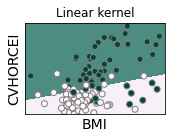

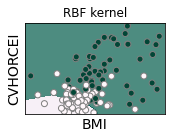

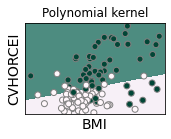

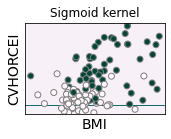

In [19]:
import matplotlib.pyplot as plt
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_stack[:, 0], X_stack[:, 1], c=y_stack, cmap=plt.cm.PuBuGn, edgecolors='grey')
    plt.xlabel('BMI')
    plt.ylabel('CVHORCEI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [20]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [21]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.8333333333333334
Accuracy Polynomial Kernel: 0.8333333333333334
Accuracy Radial Basis Kernel: 0.8333333333333334
Accuracy Sigmoid Kernel: 0.8333333333333334


In [22]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print("linear model\n", cm_lin)
print("polynominal model\n", cm_poly)
print("RBF_model\n", cm_rbf)
print("sigmoid\n", cm_sig)

linear model
 [[ 4  3]
 [ 0 11]]
polynominal model
 [[ 4  3]
 [ 0 11]]
RBF_model
 [[ 4  3]
 [ 0 11]]
sigmoid
 [[ 4  3]
 [ 0 11]]


# Data visualization

NameError: name 'svm_reg1' is not defined

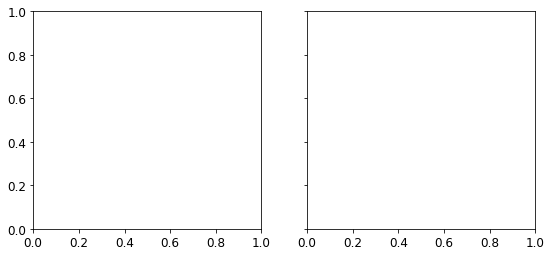

In [23]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()